# Test without train

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizer_v2 import rmsprop, gradient_descent, adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

In [2]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = 'C:/Users/User/Desktop/train'
validation_data_dir = 'C:/Users/User/Desktop/test'

In [3]:
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
print(validation_generator.class_indices)

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [5]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('C:/Users/User/Desktop/ERS/model.h5')

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [6]:
model.load_weights(os.path.join('C:/Users/User/Desktop/ERS/model.h5'))


Found 7178 images belonging to 7 classes.


C:\Users\User\Anaconda3\envs\yolov5new\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 493    9   98   82  105  150   21]
 [  22   69    8    2    3    6    1]
 [ 119    6  427   66  126  198   82]
 [  47    2   32 1532   82   51   28]
 [  91    4   67  122  738  198   13]
 [ 140    2  132  118  199  634   22]
 [  26    1   72   57   34   20  621]]
Classification Report
              precision    recall  f1-score   support

       angry       0.53      0.51      0.52       958
   disgusted       0.74      0.62      0.68       111
     fearful       0.51      0.42      0.46      1024
       happy       0.77      0.86      0.82      1774
     neutral       0.57      0.60      0.59      1233
         sad       0.50      0.51      0.51      1247
   surprised       0.79      0.75      0.77       831

    accuracy                           0.63      7178
   macro avg       0.63      0.61      0.62      7178
weighted avg       0.62      0.63      0.62      7178



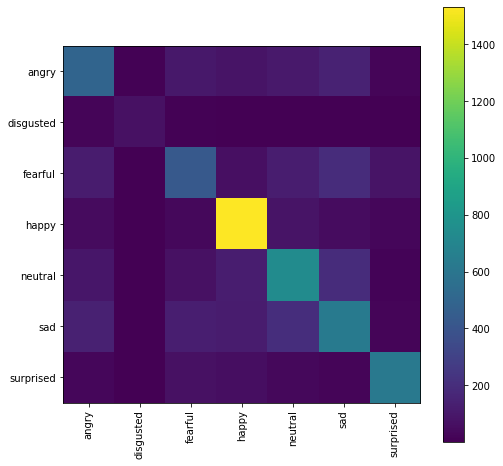

In [7]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 28709 images belonging to 7 classes.
# Found 3589 images belonging to 7 classes.


# nb_train_samples = 28273
# nb_validation_samples = 3534
nb_train_samples = 28709
nb_validation_samples = 7178

# We need to recreate our validation generator with shuffle = false
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [8]:
validation_generator.classes.shape

# len(validation_generator.classes)

(7178,)

In [9]:
y_pred.shape

(7178,)

In [10]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score


accuracy = accuracy_score(validation_generator.classes, y_pred)
accuracy


0.6288659793814433

In [13]:
tp = 493
tn = 5775
fp = 445
fn = 465

acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.8732237392031207

In [11]:
y_true = np.zeros(1000, dtype=int)
y_true[-1] = 1
y_pred = np.zeros(1000, dtype=int)
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.999

In [12]:
precision = precision_score(validation_generator.classes, y_pred, zero_division=0)
recall = recall_score(validation_generator.classes, y_pred)
print(precision)
print(recall)

NameError: name 'precision_score' is not defined